# 1.CHECKLIST DE BASE

In [1]:
#PACKAGE'S IMPORTATION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#IMPORTATION DU DATASET
data_Train_path = 'Linear_Regression.csv'
data_Test_path = 'Evaluation.csv'
Data_Train = pd.read_csv(data_Train_path)
Data_Test = pd.read_csv(data_Test_path)


# DATA'S INFORMATION AND STATISTICS

## DIMENSIONS

In [2]:
Data_Train.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
Data_Test.head()

,Hours
0,9.25


In [4]:
Data_Train.ndim

2

In [5]:
Data_Test.ndim

2

In [6]:
Data_Train.shape

(25, 2)

In [7]:
Data_Test.shape

(1, 1)

In [8]:
#Transformation of Panda Series to Numpy Array  
Array = np.array([Data_Train['Hours']])

In [9]:
Array.ndim

2

In [10]:
Array.shape

(1, 25)

In [11]:
#Redimension of Numpy Array before be use by my Supervised model
X_train = Array.reshape(-1, 1)

In [12]:
X_train.ndim

2

In [13]:
X_train.shape

(25, 1)

## Statistics

In [14]:
Data_Train.dtypes

Hours     float64
Scores      int64
dtype: object

In [15]:
Data_Train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# TYPES OF COLUNMS IN THE DATASET

In [16]:
Data_Train.select_dtypes("Int64").columns

Index(['Scores'], dtype='object')

In [17]:
Data_Train.select_dtypes("object").columns

Index([], dtype='object')

In [18]:
Data_Train.select_dtypes("Float64").columns

Index(['Hours'], dtype='object')

### VISUALISATION

Text(0.5, 1.0, "Scores In Function of Learning's Duration")

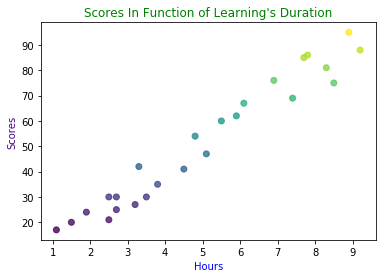

In [19]:
#Visualization of Score by Hours of Studies
plt.figure()
plt.scatter(Data_Train['Hours'],Data_Train['Scores'],alpha = 0.8,c=Data_Train['Scores'])
plt.xlabel("Hours",c="blue")
plt.ylabel("Scores",c="indigo")
plt.title("Scores In Function of Learning's Duration", c="Green")

## Usage OF Scikit-Learn Models

In [32]:
#from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV

In [21]:
X_train = X_train
Y= Data_Train['Scores']
X_Predict = Data_Test
xtrain,xtest,ytrain,ytest = train_test_split(X_train,Y,test_size = 0.2)

In [22]:
model = SGDRegressor()
model.fit(xtrain,ytrain)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
print('MODELE:',model,'\n','SCORE_ENTRAINEMENT:','>>>',model.score(xtrain,ytrain),'\n','SCORE_TEST:','>>>',model.score(xtest,ytest),'PREDICTION:','\n',model.predict(X_Predict))

MODELE: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 
 SCORE_ENTRAINEMENT: >>> 0.944069053538115 
 SCORE_TEST: >>> 0.9748120884431827 PREDICTION: 
 [92.89124586]


# VISUALIZATION BY MODEL

### VISUALIZATION ON  MODEL TRAIN PREDICTION

Text(0.5, 1.0, 'Scores In Function of Learnings Duration Model')

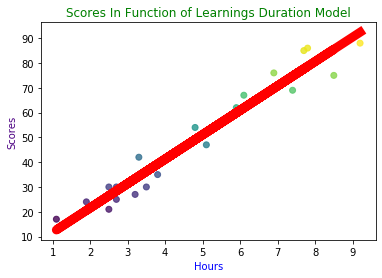

In [24]:
#Visualization of Score by Hours of Studies on the DataTrain
plt.figure()
plt.scatter(xtrain,ytrain,alpha = 0.8,c= ytrain)
plt.plot(xtrain,model.predict(xtrain),lw=9, c="red", ls ="-")
plt.xlabel("Hours",c="blue")
plt.ylabel("Scores",c="indigo")
plt.title(f'Scores In Function of Learnings Duration Model', c="Green")

## VISUALIZATION ON MODEL TEST PREDICTION

Text(0.5, 1.0, 'Scores In Function of Learnings Duration Model')

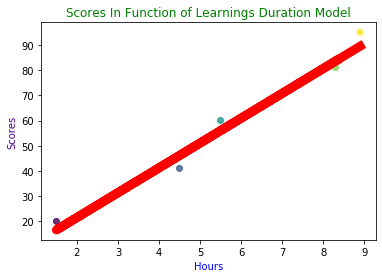

In [25]:
#Visualization of Score by Hours of Studies
plt.figure()
plt.scatter(xtest,ytest,alpha = 0.8,c= ytest)
plt.plot(xtest,model.predict(xtest),lw=9, c="red", ls ="-")
plt.xlabel("Hours",c="blue")
plt.ylabel("Scores",c="indigo")
plt.title(f'Scores In Function of Learnings Duration Model', c="Green")

## VISUALISATION ON MODEL ALL THE DATASET

Text(0.5, 1.0, 'Scores In Function of Learnings Duration Model')

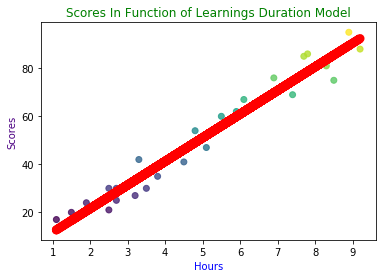

In [26]:
plt.figure()
plt.scatter(Data_Train['Hours'],Data_Train['Scores'],alpha = 0.8,c=Data_Train['Scores'])
plt.plot(Data_Train['Hours'],model.predict(X_train),lw=9, c="red", ls ="-")
plt.xlabel("Hours",c="blue")
plt.ylabel("Scores",c="indigo")
plt.title(f'Scores In Function of Learnings Duration Model', c="Green")

In [27]:
#PREDICTION WTH SGDR
model.predict(X_Predict)

array([92.89124586])

# HISTORICS

In [31]:
#Historics
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
#GridSearchCV

param_grid = {'n_iter_no_change':np.arange(1,20),'penalty': ['l2','l1'],
              'epsilon':np.arange(0.1,1)}

Grid = GridSearchCV(model,param_grid,cv=5) 

In [39]:
Grid.fit(xtrain,ytrain)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Program Files\Anaconda3\l

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'epsilon': array([0.1]),
                         'n_iter_no_change': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'penalty': ['l2', 'l1']},
 

In [40]:
Grid.best_score_ 

0.938622906215991

In [41]:
Grid.best_params_

{'epsilon': 0.1, 'n_iter_no_change': 2, 'penalty': 'l2'}

In [42]:
model = Grid.best_estimator_

In [45]:
print('MODELE:',model,'\n','SCORE_ENTRAINEMENT:','>>>',model.score(xtrain,ytrain),'\n','SCORE_TEST:','>>>',model.score(xtest,ytest),'\n','SCORE PREDICTION ON NEW VALUE:',model.predict(X_Predict))

MODELE: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=2, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 
 SCORE_ENTRAINEMENT: >>> 0.9438675489118072 
 SCORE_TEST: >>> 0.9746794784707996 
 SCORE PREDICTION ON NEW VALUE: [92.99658042]


In [47]:
#Save The Model Before Using Later